Estimate the relative performance values of CPU by using a linear regression method. 
Show clearly in a table learning parameter, 
number of iterations and cost of the regression at least for three cases. 

In [5]:
import os

import numpy as np

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  

%matplotlib inline

import pandas as pd

In [6]:
dataset = pd.read_csv('Machine.csv')

In [8]:
dataset

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
5,amdahl,580-5840,23,16000,32000,64,16,32,367,381
6,amdahl,580-5850,23,16000,32000,64,16,32,489,381
7,amdahl,580-5860,23,16000,64000,64,16,32,636,749
8,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238
9,apollo,dn320,400,1000,3000,0,1,2,38,23


In [104]:
X = dataset[dataset.columns[2:8]] 
X = X.to_numpy()

In [105]:
X

array([[   29,  8000, 32000,    32,     8,    32],
       [   29,  8000, 32000,    32,     8,    32],
       [   29,  8000, 32000,    32,     8,    32],
       ...,
       [  125,  2000,  8000,     0,     2,    14],
       [  480,   512,  8000,    32,     0,     0],
       [  480,  1000,  4000,     0,     0,     0]], dtype=int64)

In [27]:
Y = dataset[dataset.columns[8]]
Y
Y.to_numpy()

array([ 269,  220,  172,  132,  318,  367,  489,  636, 1144,   38,   40,
         92,  138,   10,   35,   19,   28,   31,  120,   30,   33,   61,
         76,   23,   69,   33,   27,   77,   27,  274,  368,   32,   63,
        106,  208,   20,   29,   71,   26,   36,   40,   52,   60,   72,
         72,   18,   20,   40,   62,   24,   24,  138,   36,   26,   60,
         71,   12,   14,   20,   16,   22,   36,  144,  144,  259,   17,
         26,   32,   32,   62,   64,   22,   36,   44,   50,   45,   53,
         36,   84,   16,   38,   38,   16,   22,   29,   40,   35,  134,
         66,  141,  189,   22,  132,  237,  465,  465,  277,  185,    6,
         24,   45,    7,   13,   16,   32,   32,   11,   11,   18,   22,
         37,   40,   34,   50,   76,   66,   24,   49,   66,  100,  133,
         12,   18,   20,   27,   45,   56,   70,   80,  136,   16,   26,
         32,   45,   54,   65,   30,   50,   40,   62,   60,   50,   66,
         86,   74,   93,  111,  143,  105,  214,  2

In [106]:
def computeCostMulti(X, y, theta):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [107]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
   
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
    

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
        cost = computeCostMulti(X, y, theta)
    
    return theta, J_history, cost

# Set learning rate as 0.001 with 5 iterations

In [142]:
alpha = 0.001
num_iters = 5

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history, cost = gradientDescentMulti(X, Y, theta, alpha, num_iters)

In [143]:
theta

array([9.74513175e+22, 5.48906655e+24, 2.17364085e+25, 4.33500980e+22,
       7.89143818e+21, 2.90576421e+22])

In [144]:
cost

7.399867395808094e+58

Text(0, 0.5, 'Cost J')

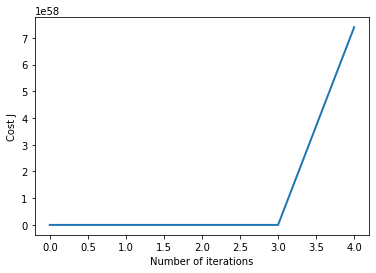

In [145]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Set learning rate as 0.00001 with 100 iterations

In [150]:
alpha = 0.00001
num_iters = 100

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history, cost = gradientDescentMulti(X, Y, theta, alpha, num_iters)

c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
c:\users\sravya bhaskara\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


In [151]:
cost

0.0

In [152]:
theta

array([nan, nan, nan, nan, nan, nan])

Text(0, 0.5, 'Cost J')

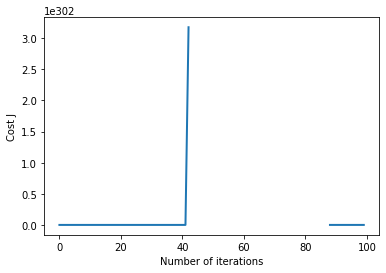

In [153]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Set learning rate as 0.00001 with 100 iterations

In [176]:
alpha = 0.01
num_iters = 3

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history, cost = gradientDescentMulti(X, Y, theta, alpha, num_iters)

In [177]:
theta

array([1.12394176e+15, 6.33116130e+16, 2.50699923e+17, 4.99993415e+14,
       9.10180564e+13, 3.35134971e+14])

In [178]:
cost

9.84371375683414e+42

Text(0, 0.5, 'Cost J')

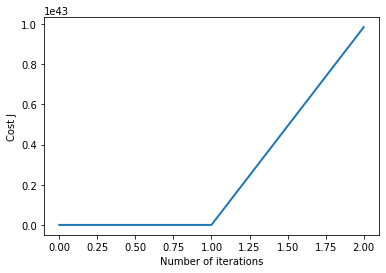

In [179]:
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')